In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import itertools

In [3]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

wine_r = pd.read_csv("winequality-red.csv", sep=';')
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

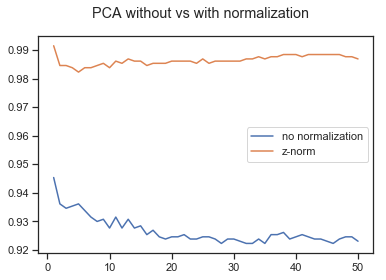

In [3]:
def comparePCA(d, legend):
    X_train, X_test, y_train, y_test = train_test_split(d, np.ravel(wine[[C]]), test_size=0.2, random_state = 42) 
    pca = PCA(n_components=5).fit(X_train)
    plt.plot(range(1,51), [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(pca.transform(X_train), y_train).predict(pca.transform(X_test))) for k in range(1,51)], label=legend)

fig = plt.figure()
comparePCA(wine[D].values, 'no normalization')
comparePCA(StandardScaler().fit_transform(wine[D]), 'z-norm')
plt.legend()
fig.suptitle('PCA without vs with normalization')
# fig.savefig("Q1_PCA_ifNormalized.png", dpi=200)
plt.show()

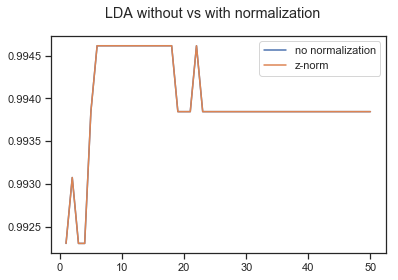

In [4]:
def compareLDA(d, legend):
    X_train, X_test, y_train, y_test = train_test_split(d, np.ravel(wine[[C]]), test_size=0.2, random_state = 42) 
    lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
    plt.plot(range(1,51), [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(lda.transform(X_train), y_train).predict(lda.transform(X_test))) for k in range(1,51)], label=legend)

fig = plt.figure()
compareLDA(wine[D].values, 'no normalization')
compareLDA(StandardScaler().fit_transform(wine[D]), 'z-norm')
plt.legend()
fig.suptitle('LDA without vs with normalization')
# fig.savefig("Q1_LDA_ifNormalized.png", dpi=200)
plt.show()

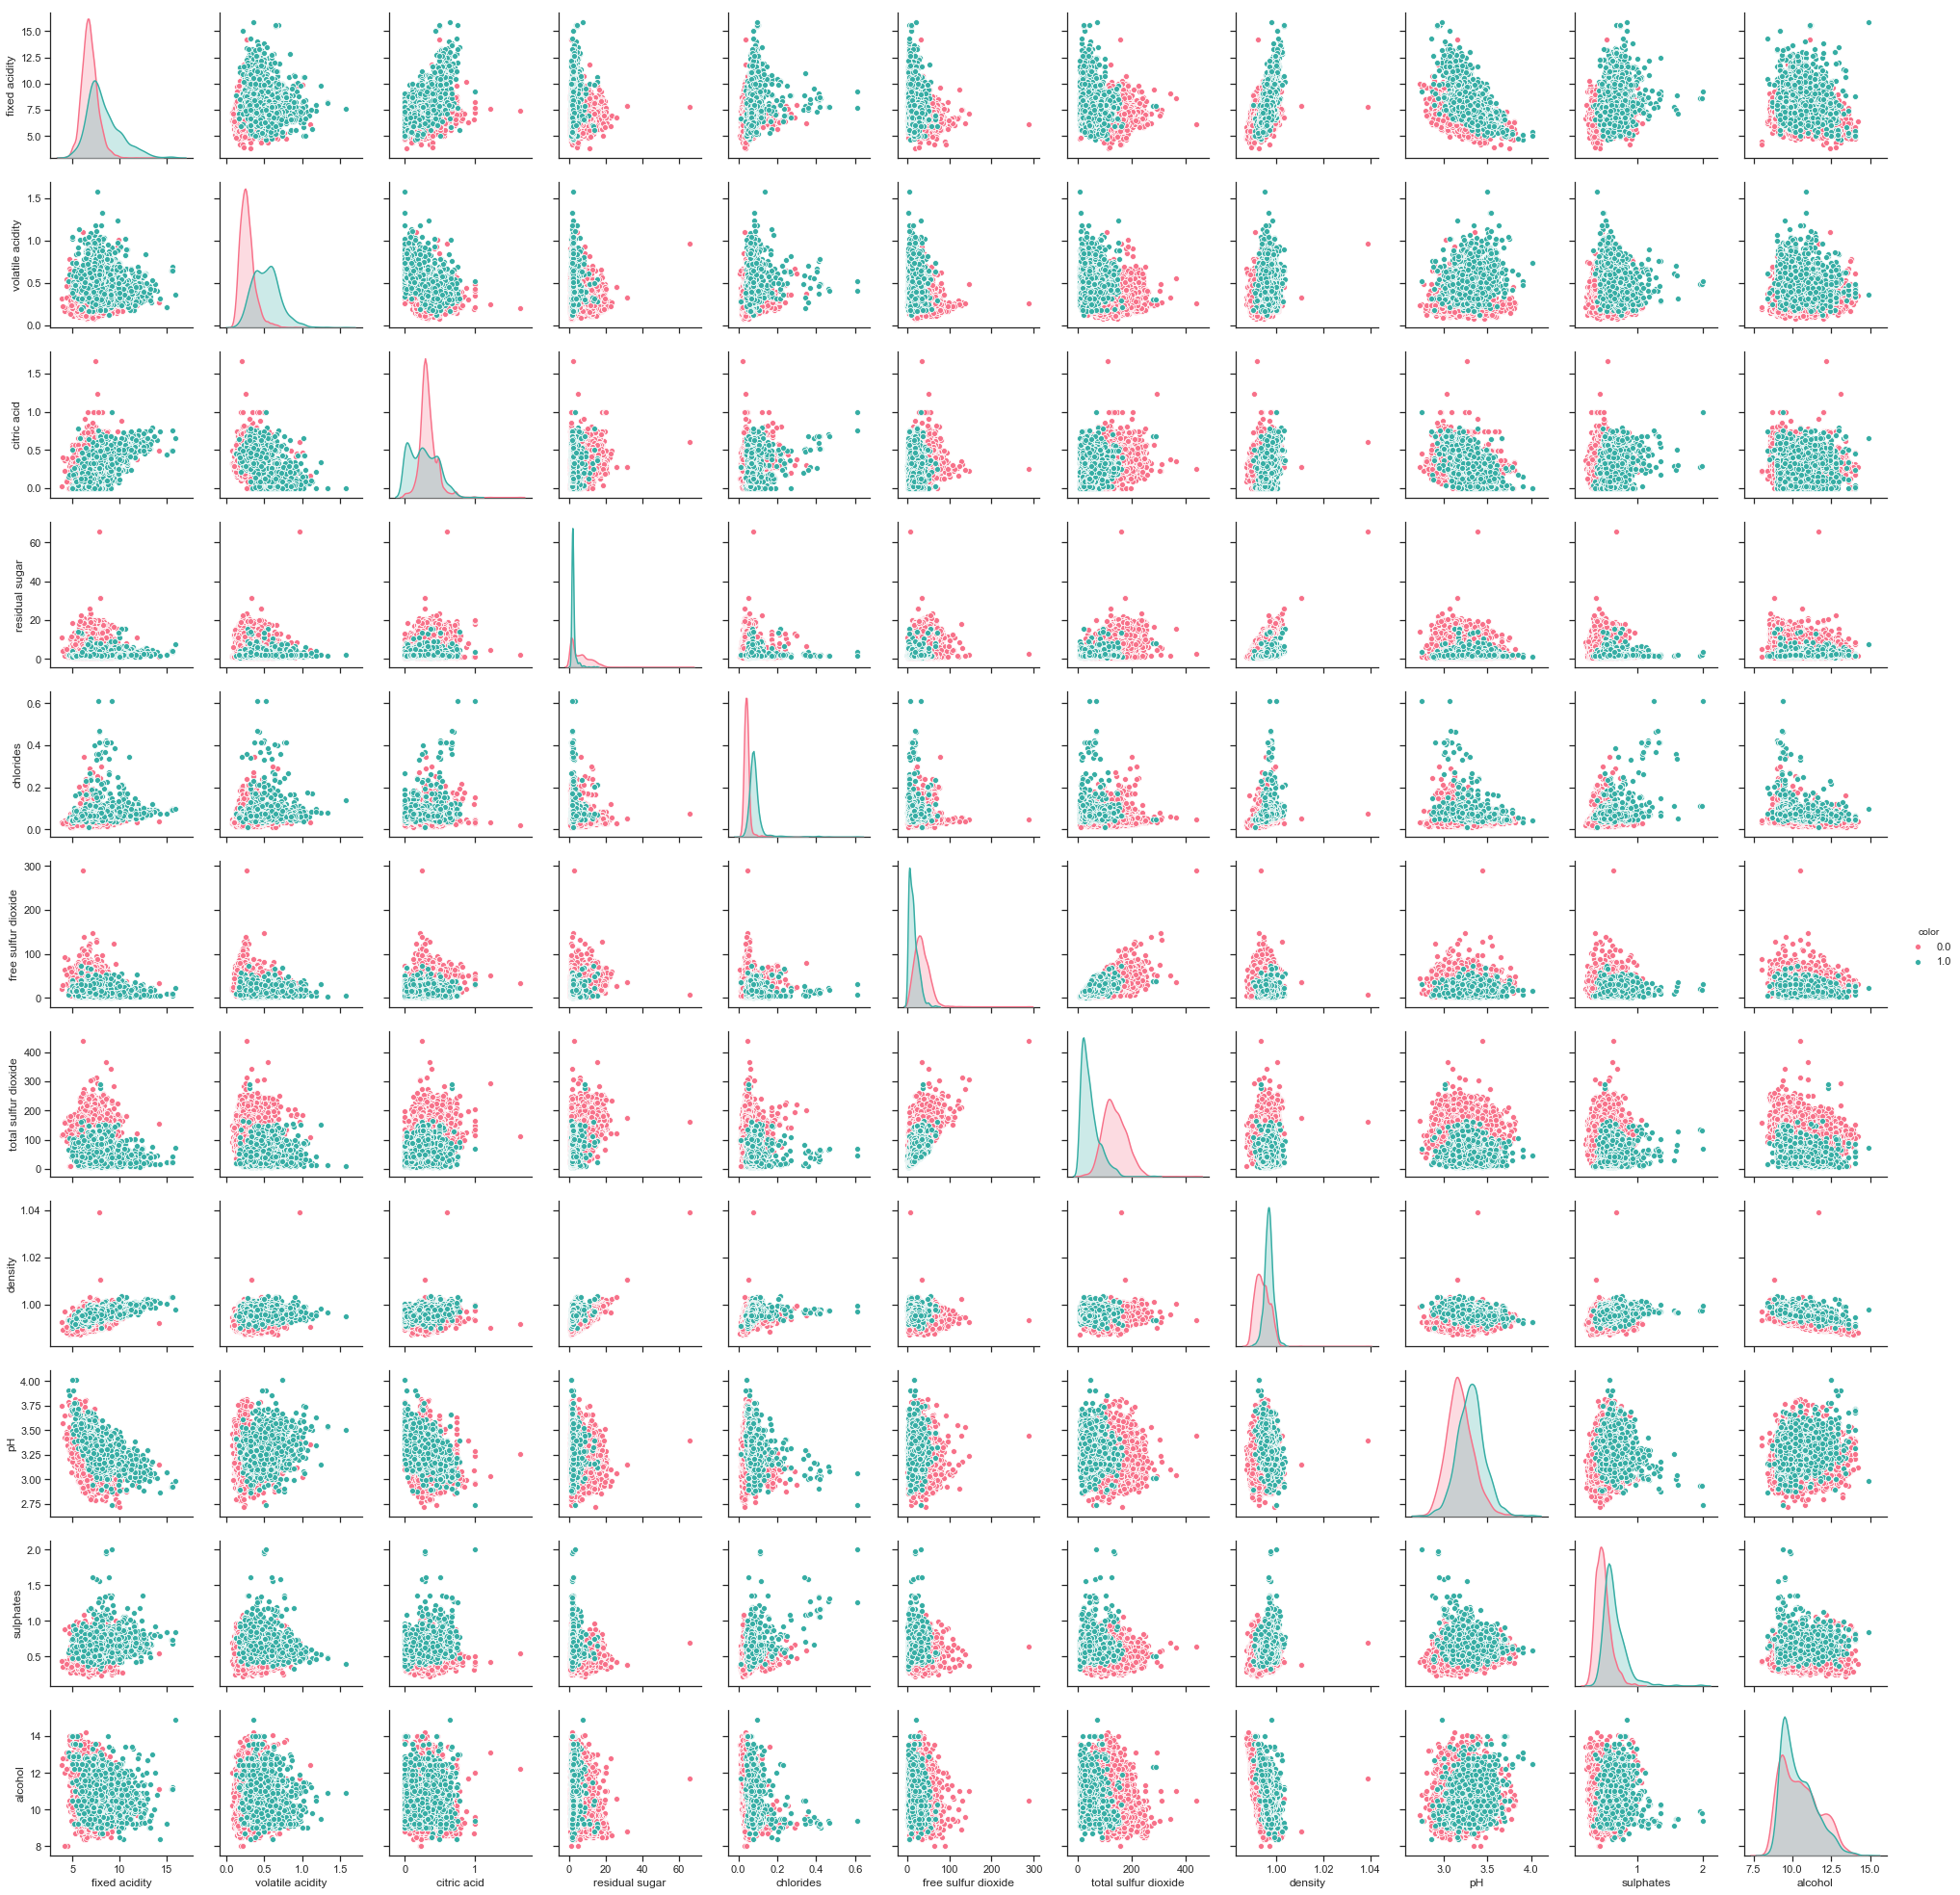

In [5]:
f = sns.pairplot(wine[DLC], vars = D, hue="color", palette="husl")
# f.savefig("Q1_no_normalization.png", dpi=200)
plt.show()

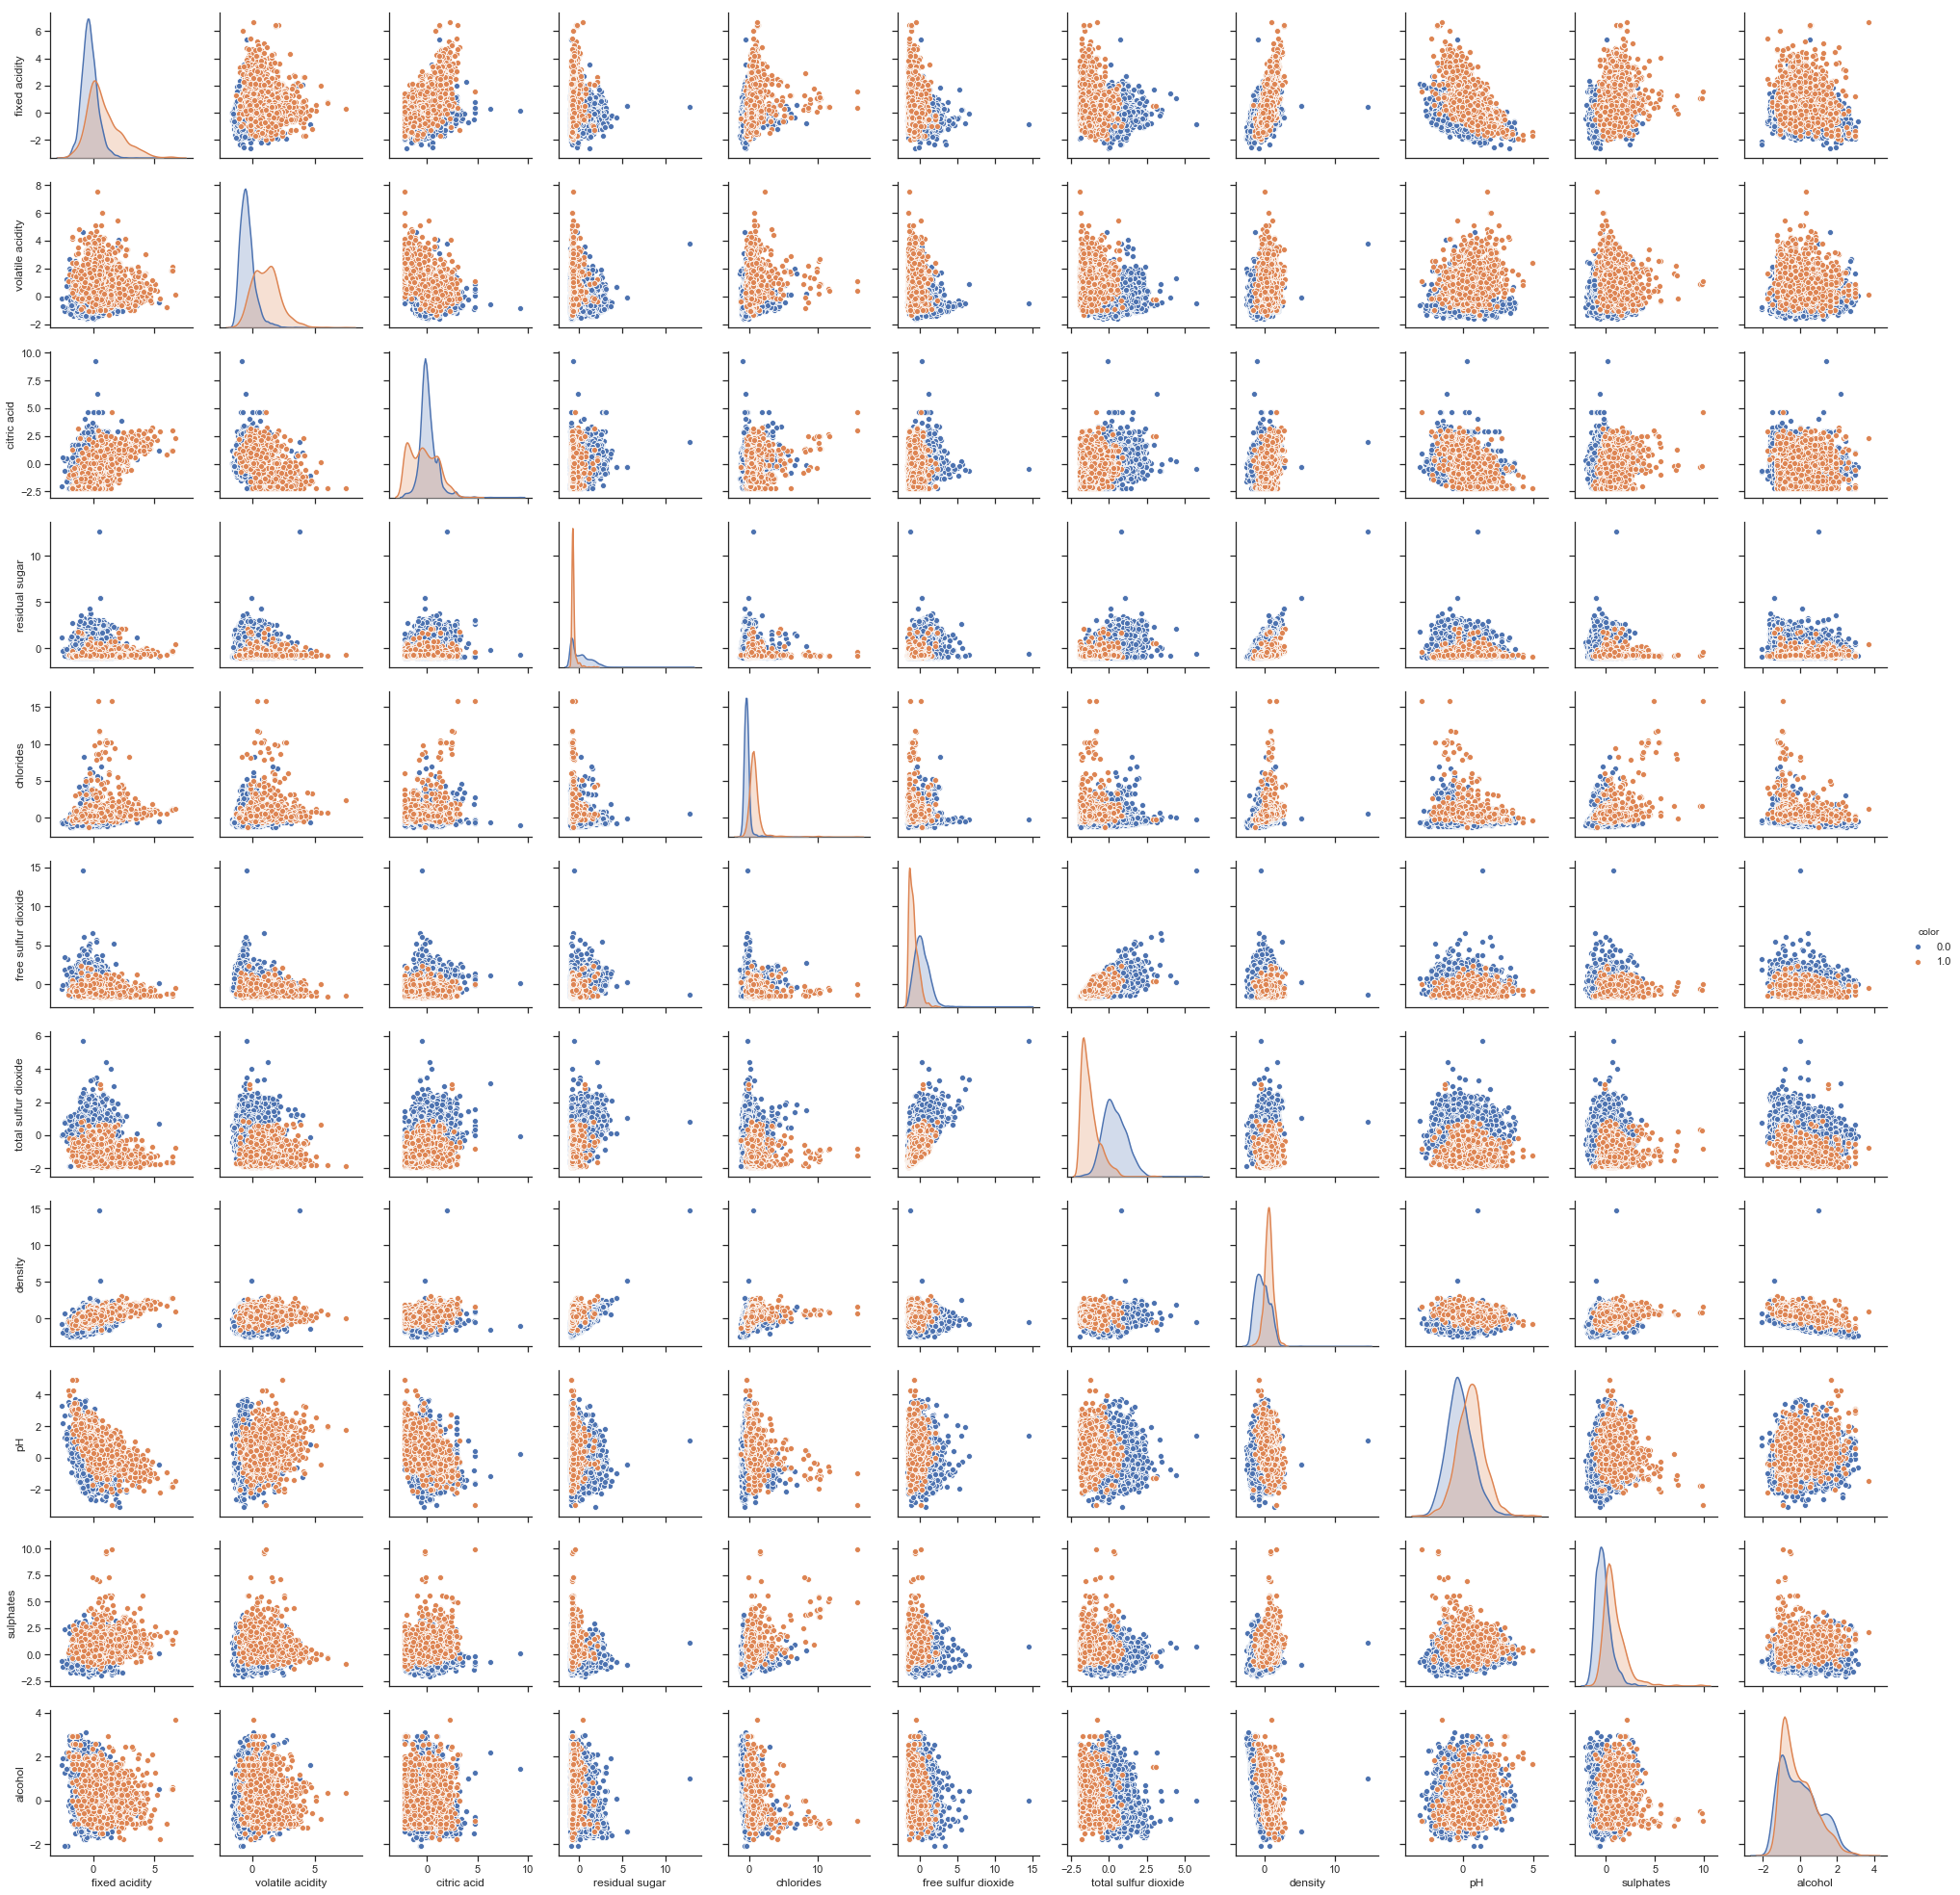

In [3]:
wine[D] = StandardScaler().fit_transform(wine[D])
f = sns.pairplot(wine[DLC], vars = D, hue="color")
# f.savefig("Q1_zscore_normalization.png", dpi=200)
plt.show()

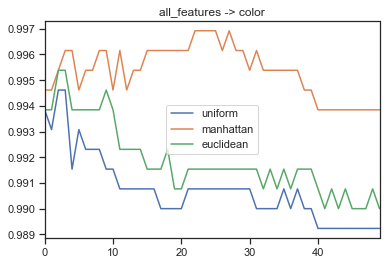

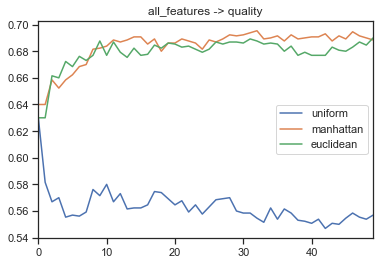

In [7]:
params = {
    'uniform': {},
    'manhattan': {'weights':"distance", 'p':1},
    'euclidean': {'weights':"distance", 'p': 2}
}
acc = pd.DataFrame(np.zeros((50,len(params))), columns=params.keys())
for j in [C, L]:
    X_train, X_test, y_train, y_test = train_test_split(wine[D].values, np.ravel(wine[[j]]), test_size=0.2, random_state = 42)
    for key, v in params.items():
        acc[key] = pd.Series([accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k, **params[key]).fit(X_train, y_train).predict(X_test)) for k in range(1,51)])
    f = acc.plot(kind = 'line', title = 'all_features -> ' + j).get_figure()
#     f.savefig('Q1_all_features_' + j + '.png', dpi=300)
    plt.show()

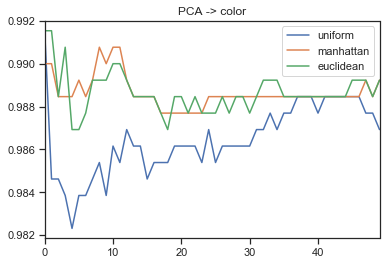

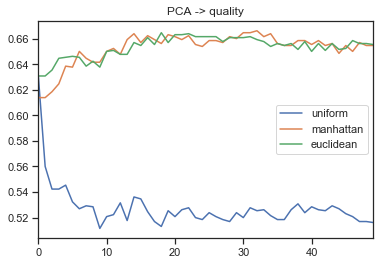

In [8]:
for j in [C, L]:
    X_train, X_test, y_train, y_test = train_test_split(wine[D].values, np.ravel(wine[[j]]), test_size=0.2, random_state = 42) 
    pca = PCA(n_components=5).fit(X_train)
    for key, v in params.items():
        acc[key] = pd.Series([accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k, **params[key]).fit(pca.transform(X_train), y_train).predict(pca.transform(X_test))) for k in range(1,51)])
    f = acc.plot(kind = 'line', title = 'PCA -> ' + j).get_figure()
#     f.savefig('Q1_PCA_' + j + '.png', dpi=300)
    plt.show()

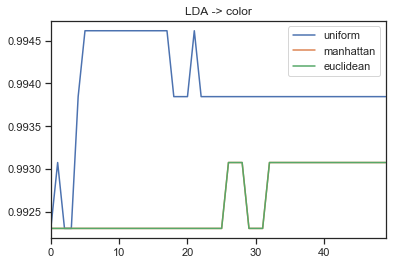

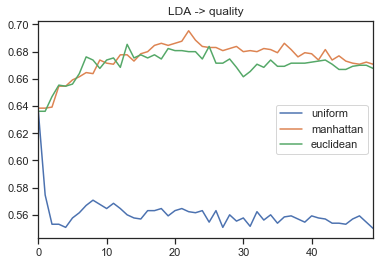

In [9]:
for j in [C, L]:
    X_train, X_test, y_train, y_test = train_test_split(wine[D].values, np.ravel(wine[[j]]), test_size=0.2, random_state = 42) 
    lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
    for key, v in params.items():
        acc[key] = pd.Series([accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k, **params[key]).fit(lda.transform(X_train), y_train).predict(lda.transform(X_test))) for k in range(1,51)])
    f = acc.plot(kind='line', title='LDA -> ' + j).get_figure()
#     f.savefig('Q1_LDA_' + j + '.png', dpi=300)
    plt.show()

In [1]:
for j, k in zip([C, L], [[0.0, 1.0], sorted(np.unique(wine[[L]]))]):
    pcaDf = pd.DataFrame(data = PCA(n_components=2).fit_transform(wine[D].values), columns = ['PC1', 'PC2'])
    pcaDf.insert(2, j, wine[[j]].values, True)
    fig, ax = plt.subplots()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('PCA -> ' + j)
    [ax.scatter(pcaDf.loc[pcaDf[j] == i, 'PC1'], pcaDf.loc[pcaDf[j] == i, 'PC2'], edgecolors='w') for i in k] 
    ax.legend(k)
#     plt.show()
#     fig.savefig('Q1_PCA_Scatter_' + j + '.png', dpi=300)

NameError: name 'C' is not defined

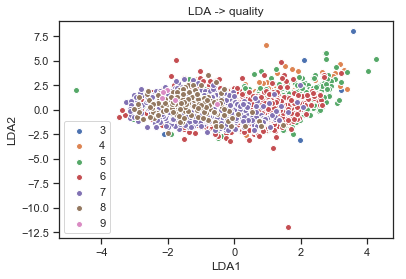

In [11]:
ldaDf = pd.DataFrame(data = LinearDiscriminantAnalysis(n_components=2).fit_transform(wine[D].values, np.ravel(wine[[L]])), columns = ['LDA1', 'LDA2'])
ldaDf.insert(2, L, wine[[L]].values, True)
fig, ax = plt.subplots()
ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')
ax.set_title('LDA -> ' + L)
[ax.scatter(ldaDf.loc[ldaDf[L] == i, 'LDA1'], ldaDf.loc[ldaDf[L] == i, 'LDA2'], edgecolors='w') for i in sorted(np.unique(wine[[L]]))] 
ax.legend(sorted(np.unique(wine[[L]])))
# fig.savefig('Q1_LDA_Scatter_quality.png', dpi=300)
plt.show()

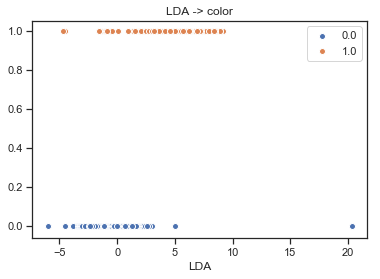

In [5]:
ldaDf = pd.DataFrame(data = LinearDiscriminantAnalysis().fit_transform(wine[D].values, np.ravel(wine[[C]])), columns = ['LDA'])
ldaDf.insert(1, C, wine[[C]].values, True)
fig, ax = plt.subplots()
ax.set_xlabel('LDA')
ax.set_title('LDA -> ' + C)
ax.scatter(ldaDf.loc[ldaDf[C] == 0.0, 'LDA'], np.zeros_like(ldaDf.loc[ldaDf[C] == 0.0, 'LDA']), edgecolors='w')
ax.scatter(ldaDf.loc[ldaDf[C] == 1.0, 'LDA'], np.ones_like(ldaDf.loc[ldaDf[C] == 1.0, 'LDA']), edgecolors='w')
ax.legend([0.0, 1.0])
# fig.savefig('Q1_LDA_Scatter_color.png', dpi=300)
plt.show()

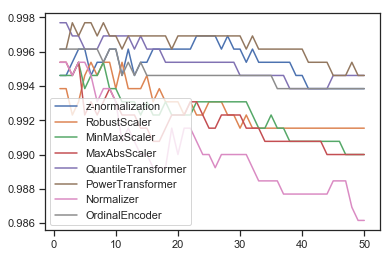

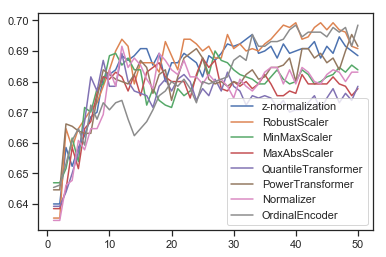

In [15]:
## bonus: code to iterate through all scalers, it takes ~3mins to run
# for j in [C, L]:
#     scalers = {
#         'z-normalization': train_test_split(StandardScaler().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'RobustScaler': train_test_split(RobustScaler().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'MinMaxScaler': train_test_split(MinMaxScaler().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'MaxAbsScaler': train_test_split(MaxAbsScaler().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'QuantileTransformer': train_test_split(QuantileTransformer(random_state=42).fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'PowerTransformer': train_test_split(PowerTransformer().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'Normalizer': train_test_split(Normalizer().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#         'OrdinalEncoder': train_test_split(OrdinalEncoder().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
# #         'OneHotEncoder': train_test_split(OneHotEncoder().fit_transform(wine[D]), np.ravel(wine[[j]]), test_size=0.2, random_state = 42),
#     }

#     for key, v in scalers.items():
#         plt.plot(range(1,51), [accuracy_score(v[3], KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1).fit(v[0], v[2]).predict(v[1])) for k in range(1,51)], label=key)
#     plt.legend()
# #     plt.savefig('Q1_BestParam_' + j + '.png', dpi=300)
#     plt.show()

In [14]:
## bonus: code to iterate through all 11C4 combinations of features, it takes ~30mins to run

# X_train, X_test, y_train, y_test = train_test_split(wine[D].values, np.ravel(wine[[C]]), test_size=0.2, random_state = 42)
# resDictST = {}
# resDict = {'uniform': {}, 'manhattan': {}, 'euclidean': {}}
# selectedDict = {'uniform': {}, 'manhattan': {}, 'euclidean': {}}
# for key, v in params.items():
#     resDictST[key] = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k, **v).fit(X_train, y_train).predict(X_test)) for k in range(1,51)]
#     for i in itertools.combinations(range(len(D)), 4):
#         resDict[key][tuple(D[y] for y in i)] = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k, **params[key]).fit(X_train[:,list(i)], y_train).predict(X_test[:,list(i)])) for k in range(1,51)]

# for key in params.keys():
#     for k, v in resDict[key].items():
#         if sum(v[i] > resDictST[key][i] for i in range(len(resDictST[key]))) > len(resDictST[key])//2:
#             selectedDict[key][k] = v

# for k, v in selectedDict.items():
#     print([k, v])